# Travail B1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import read_range_days, compute_total_return, plot_price_data
from utils import plot_number_of_trades_per_day, compute_naive_qv
from utils import plot_naive_qv, compute_subsampling_qv, plot_subsampling_qv, plot_historical_events
from utils import compute_naive_bv, plot_naive_bv, compute_subsampling_bv, plot_subsampling_bv
from utils import compute_sum_squared_jumps, plot_ssj
from utils2 import compute_rv, compute_bv, compute_jumps
import numpy as np
import datetime as dt


In [2]:
PATH = "data/"
plt.rcParams["figure.figsize"] = (18, 6)

In [3]:
df_full = pd.read_pickle(f"{PATH}full_data.pkl")

In [4]:
df_1990 = pd.read_pickle(f"{PATH}1990.pkl")
df_2001 = pd.read_pickle(f"{PATH}2001.pkl")
df_2007 = pd.read_pickle(f"{PATH}2007.pkl")
df_2018 = pd.read_pickle(f"{PATH}2018.pkl")

df_1990.shape, df_2001.shape, df_2007.shape, df_2018.shape

((98670, 12), (98670, 12), (97890, 12), (91650, 12))

In [5]:
timesteps = [1, 5, 10, 30, 60]

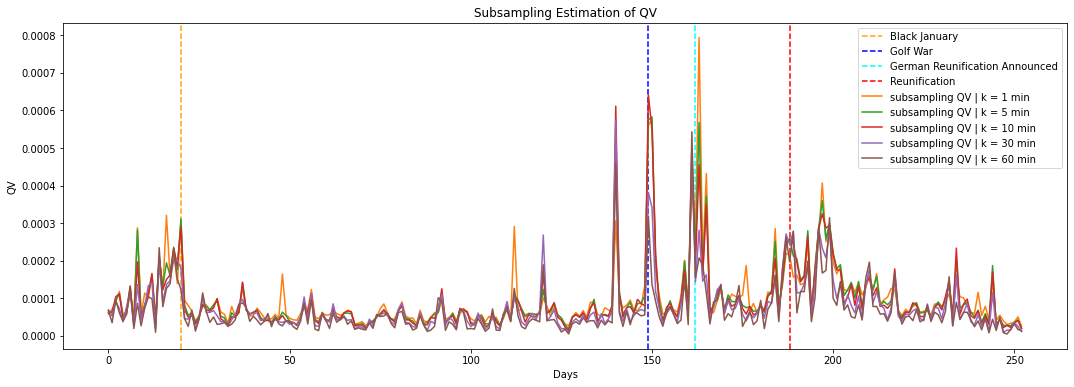

In [6]:
plot_historical_events(df_1990)
compute_rv('data/1990', naive=False, timesteps=timesteps)

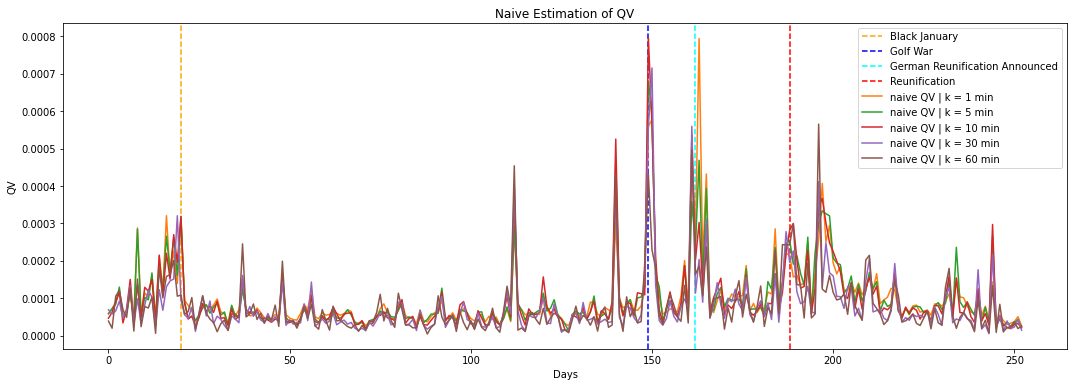

In [7]:
plot_historical_events(df_1990)
compute_rv('data/1990', naive=True, timesteps=timesteps)

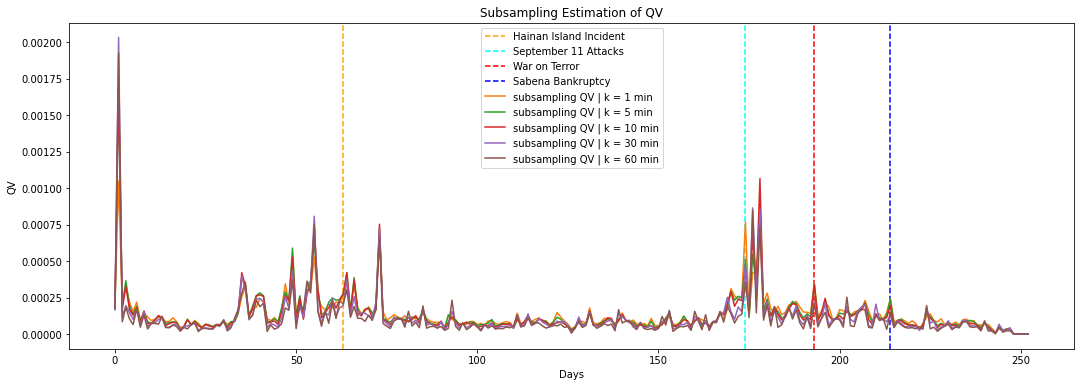

In [8]:
plot_historical_events(df_2001)
compute_rv('data/2001', naive=False, timesteps=timesteps)

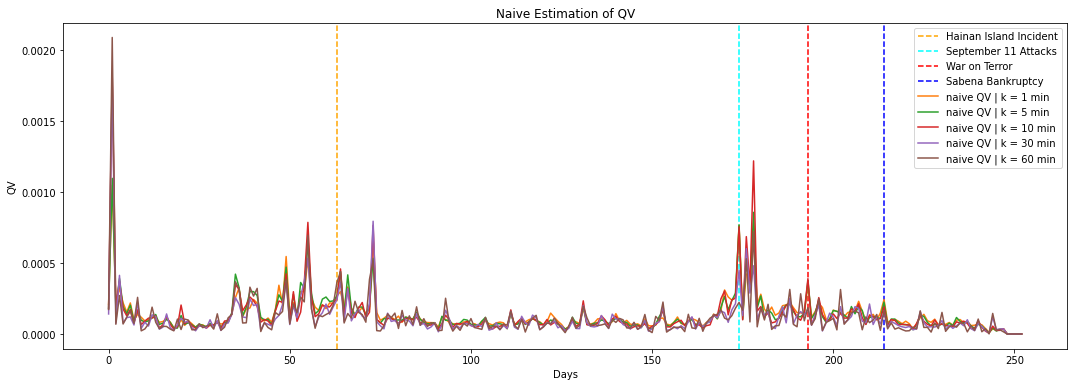

In [9]:
plot_historical_events(df_2001)
compute_rv('data/2001', naive=True, timesteps=timesteps)

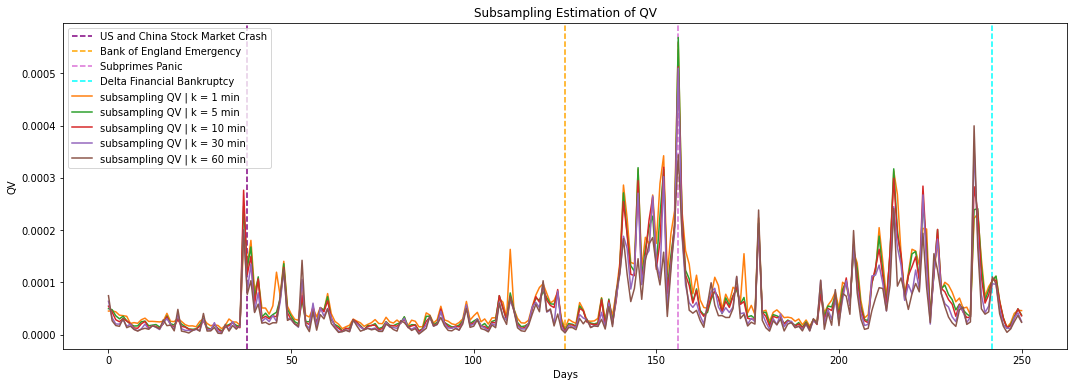

In [10]:
plot_historical_events(df_2007)
compute_rv('data/2007', naive=False, timesteps=timesteps)

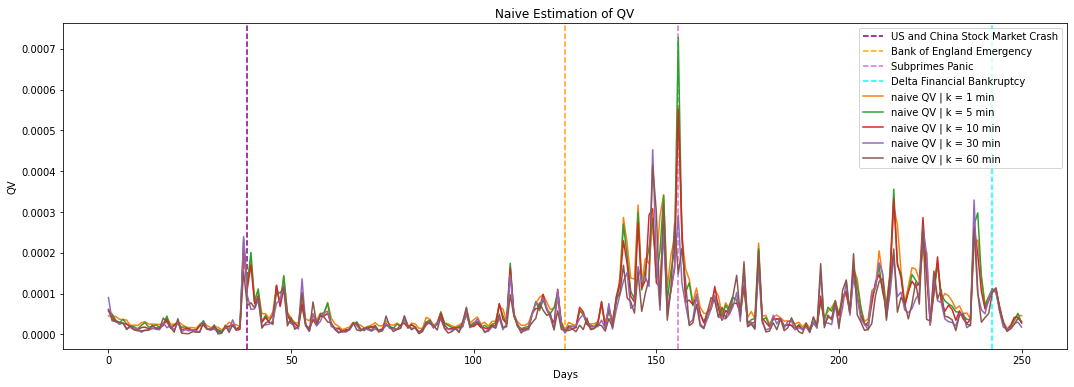

In [11]:
plot_historical_events(df_2007)
compute_rv('data/2007', naive=True, timesteps=timesteps)

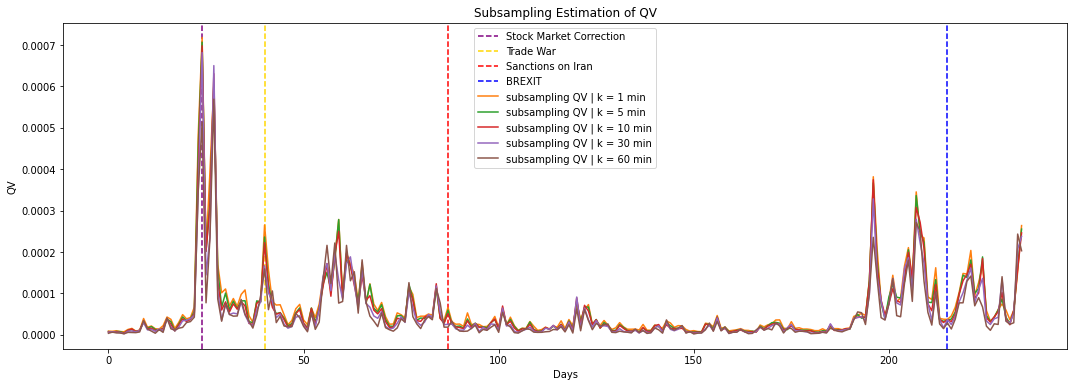

In [12]:
plot_historical_events(df_2018)
compute_rv('data/2018', naive=False, timesteps=timesteps)

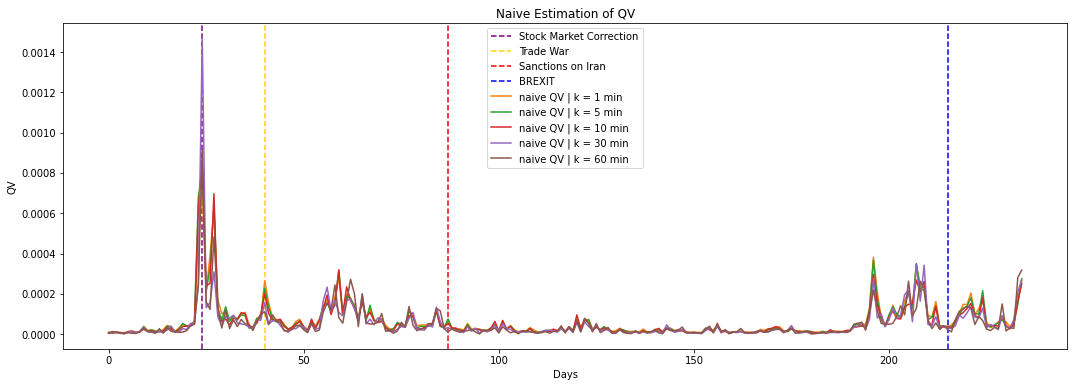

In [13]:
plot_historical_events(df_2018)
compute_rv('data/2018', naive=True, timesteps=timesteps)

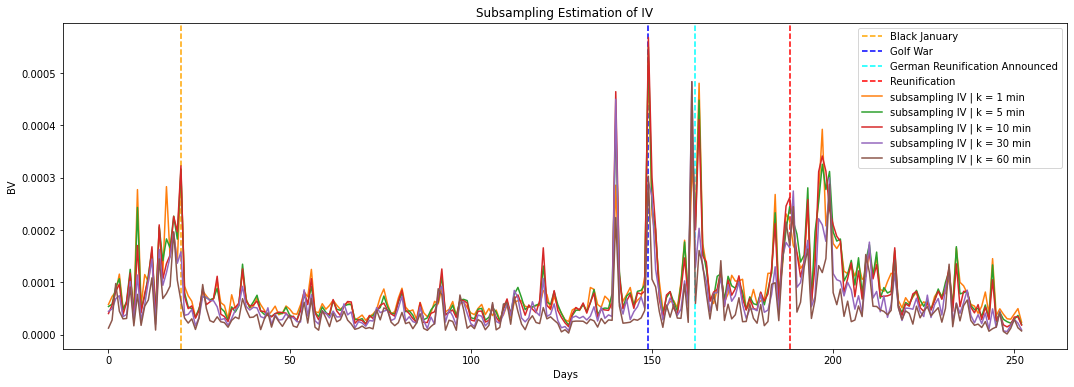

In [14]:
plot_historical_events(df_1990)
compute_bv('data/1990', naive=False, timesteps=timesteps)

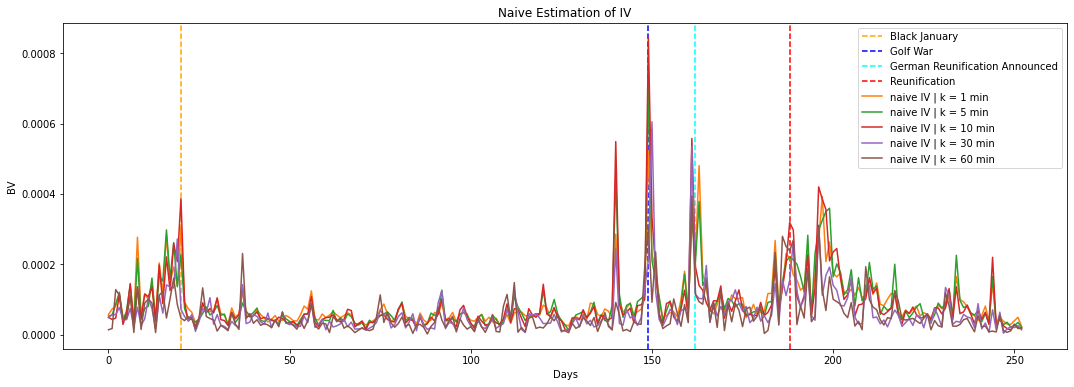

In [15]:
plot_historical_events(df_1990)
compute_bv('data/1990', naive=True, timesteps=timesteps)

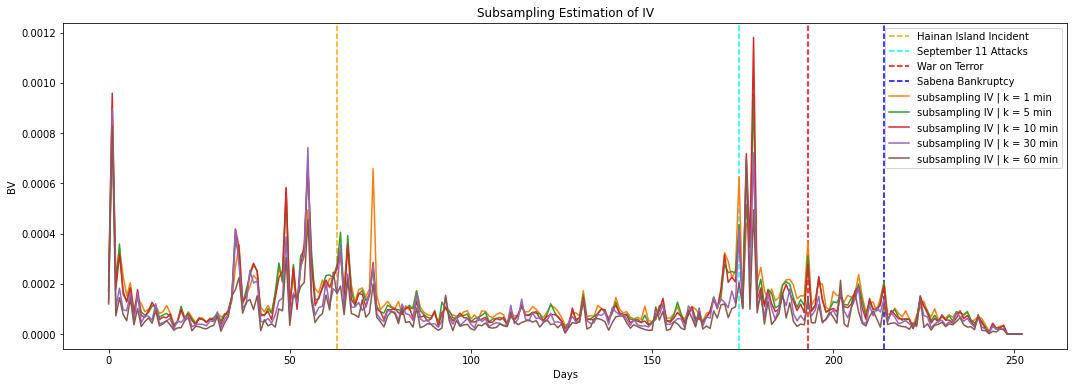

In [16]:
plot_historical_events(df_2001)
compute_bv('data/2001', naive=False, timesteps=timesteps)

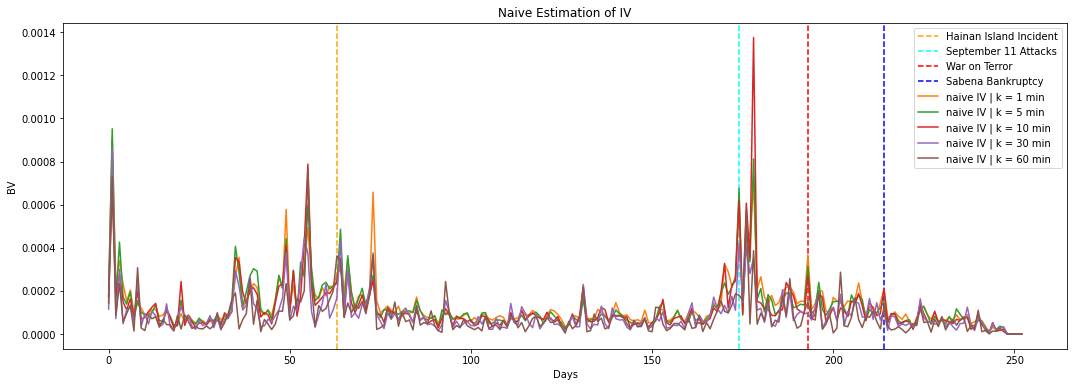

In [17]:
plot_historical_events(df_2001)
compute_bv('data/2001', naive=True, timesteps=timesteps)

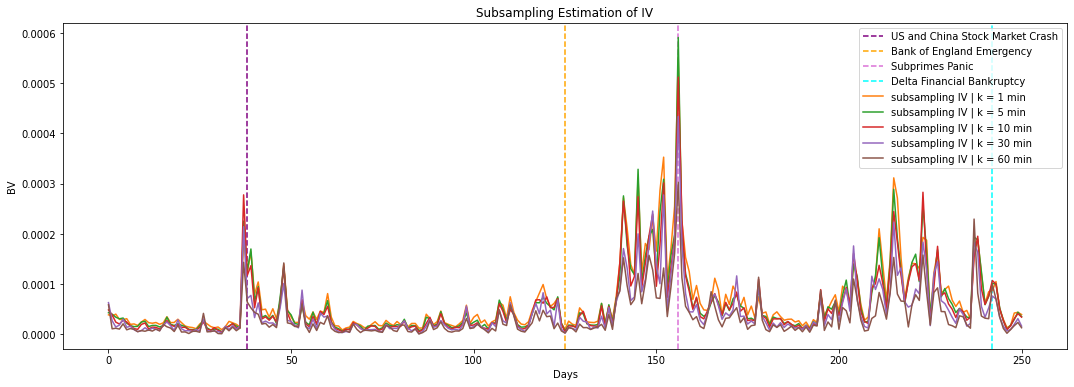

In [18]:
plot_historical_events(df_2007)
compute_bv('data/2007', naive=False, timesteps=timesteps)

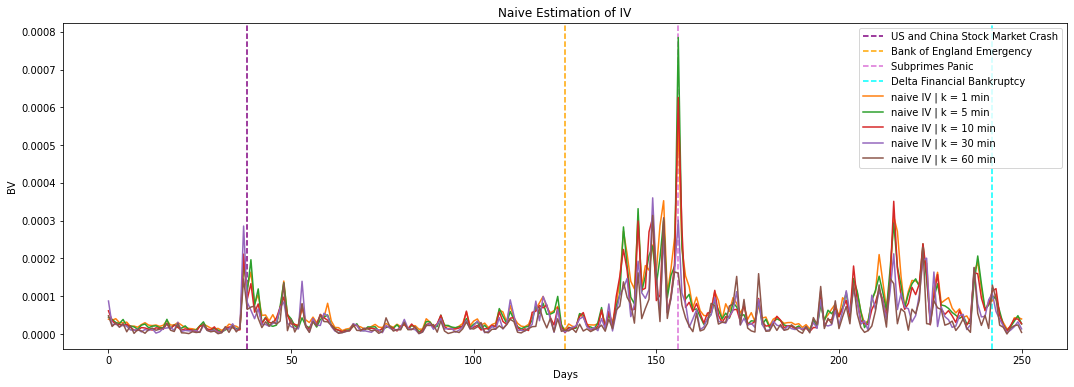

In [19]:
plot_historical_events(df_2007)
compute_bv('data/2007', naive=True, timesteps=timesteps)

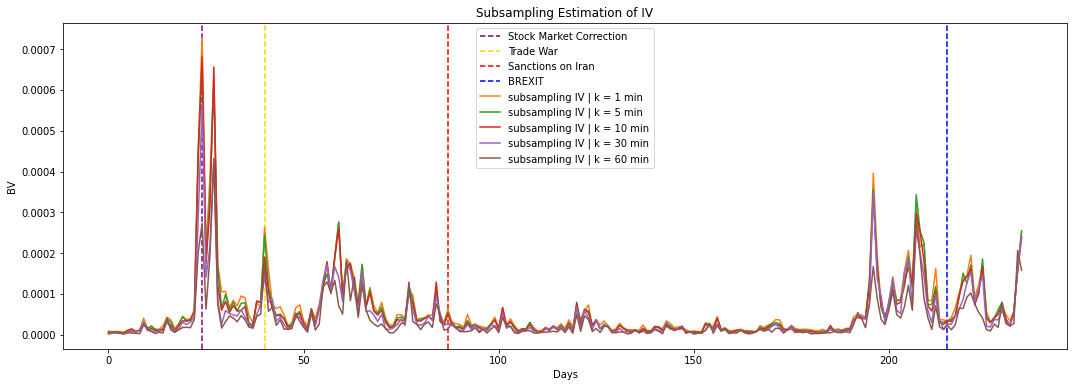

In [20]:
plot_historical_events(df_2018)
compute_bv('data/2018', naive=False, timesteps=timesteps)

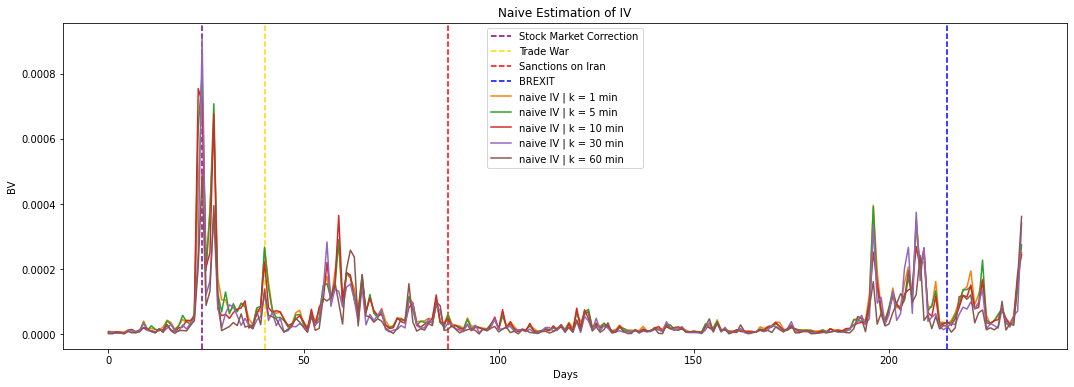

In [21]:
plot_historical_events(df_2018)
compute_bv('data/2018', naive=True, timesteps=timesteps)

In [22]:
df_1990.isna().sum().sum(), df_2001.isna().sum().sum(), df_2007.isna().sum().sum(), df_2018.isna().sum().sum()

(0, 0, 0, 0)

On a remarqué que df_2001 possédait un grand nombre de valeurs manquante. On va donc supprimer les lignes qui en possèdent.

In [23]:
df_2001

Date TimeZone ContractName     Open    Close     High  \
0     2001-01-02 09:30:59     'ET'      'ESH01'  1331.25  1331.25  1332.25   
1     2001-01-02 09:31:59     'ET'      'ESH01'  1331.25  1331.50  1332.50   
2     2001-01-02 09:32:59     'ET'      'ESH01'  1331.75  1331.00  1332.00   
3     2001-01-02 09:33:59     'ET'      'ESH01'  1331.00  1329.25  1331.25   
4     2001-01-02 09:34:59     'ET'      'ESH01'  1329.50  1327.75  1329.50   
...                   ...      ...          ...      ...      ...      ...   
98665 1990-12-31 15:55:59     'ET'      'SPH91'  1148.75  1148.00  1148.75   
98666 1990-12-31 15:56:59     'ET'      'SPH91'  1148.75  1148.00  1148.75   
98667 1990-12-31 15:57:59     'ET'      'SPH91'  1148.75  1148.00  1148.75   
98668 1990-12-31 15:58:59     'ET'      'SPH91'  1148.75  1148.00  1148.75   
98669 1990-12-31 15:59:59     'ET'      'SPH91'  1148.75  1148.00  1148.75   

           Low  LastTradedPrice  LagSameContractLastTradedPrice  Volume  \
0      1330.50          1331.25                         1331.25     0.0   
1      1330.75          1331.50                         1331.25     0.0   
2      1330.75          1331.00                         1331.50     0.0   
3      1329.25          1329.25                         1331.00     0.0   
4      1327.50          1327.75                         1329.25     0.0   
...        ...              ...                             ...     ...   
98665  1147.00          1148.00                         1149.00     0.0   
98666  1147.00          1148.00                         1149.00     0.0   
98667  1147.00          1148.00                         1149.00     0.0   
98668  1147.00          1148.00                         1149.00     0.0   
98669  1147.00          1148.00                         1149.00     0.0   

       NbTrade  LogReturn  
0        120.0   0.000000  
1        124.0   0.000188  
2         91.0  -0.000376  
3        116.0  -0.001316  
4        101.0  -0.001129  
...        ...        ...  
98665    144.0  -0.000871  
98666    144.0  -0.000871  
98667    144.0  -0.000871  
98668    144.0  -0.000871  
98669    144.0  -0.000871  

[98670 rows x 12 columns]

In [24]:
df_full.shape

(386880, 12)

In [25]:
df_full.columns

Index(['Date', 'TimeZone', 'ContractName', 'Open', 'Close', 'High', 'Low',
       'LastTradedPrice', 'LagSameContractLastTradedPrice', 'Volume',
       'NbTrade', 'LogReturn'],
      dtype='object')

In [26]:
df_full.isna().sum()

Date                              0
TimeZone                          0
ContractName                      0
Open                              0
Close                             0
High                              0
Low                               0
LastTradedPrice                   0
LagSameContractLastTradedPrice    0
Volume                            0
NbTrade                           0
LogReturn                         0
dtype: int64

In [27]:
df_full['ContractName'].unique()

array(["'SPH90'", "''", "'SPM90'", "'SPU90'", "'SPZ90'", "'SPH91'",
       "'ESH01'", "'ESM01'", "'ESU01'", "'ESZ01'", "'ESH02'", "'ESH07'",
       "'ESM07'", "'ESU07'", "'ESZ07'", "'ESH08'", "'ESH18'", "'ESM18'",
       "'ESU18'", "'ESZ18'", "'ESH19'"], dtype=object)

In [28]:
compute_subsampling_qv(df_1990, k=5)

array([6.05184206e-05, 6.40178932e-05, 9.51157010e-05, 1.11712870e-04,
       5.09491942e-05, 6.11488276e-05, 1.23086709e-04, 3.90342948e-05,
       2.81775799e-04, 5.06671906e-05, 8.17924100e-05, 1.14166545e-04,
       1.64050676e-04, 4.20116357e-05, 2.05690607e-04, 1.31593836e-04,
       1.94379795e-04, 1.61257668e-04, 2.37266813e-04, 1.77009544e-04,
       3.11143023e-04, 8.16377029e-05, 5.45297559e-05, 6.17781877e-05,
       3.69145885e-05, 5.26194741e-05, 7.87062023e-05, 7.84050280e-05,
       6.96700584e-05, 8.25976502e-05, 9.29384511e-05, 5.23145737e-05,
       4.77896802e-05, 2.77099951e-05, 6.15923615e-05, 5.09001123e-05,
       6.20670600e-05, 1.39927775e-04, 6.85905566e-05, 5.81182362e-05,
       6.25161908e-05, 6.90754955e-05, 4.83491172e-05, 4.19151615e-05,
       4.10396664e-05, 3.76787088e-05, 5.16134396e-05, 4.42224914e-05,
       6.33506417e-05, 5.38138741e-05, 3.87943770e-05, 3.53537413e-05,
       3.12458110e-05, 4.97699186e-05, 7.70073349e-05, 6.03515738e-05,
      

### Question 1

Use four years of intraday data (1990, 2001, 2007 and 2018). Visualize your dataset. Do you detect anomalies?

#### Analysis of anomalies

- More intensive trading at the beginning and the end of the trading day combined with higher price volatility.
- Returns realized in the first 30 minutes and the last 1 minute of the trading day is more than the rest of the day?
- Presence of jumps ?

In [29]:
df_period = read_range_days(df_full, '1990-01-22', 1)
plot_price_data(df_period)

### Question 2

Compute the naive and the subsampling estimators of the quadratic variation each day for various time steps

- Report your time series and relate your observation to important financial events.
- What should be the time step. Justify your decision.

In [30]:
k_list = [1, 5, 10, 15, 20, 30, 60]

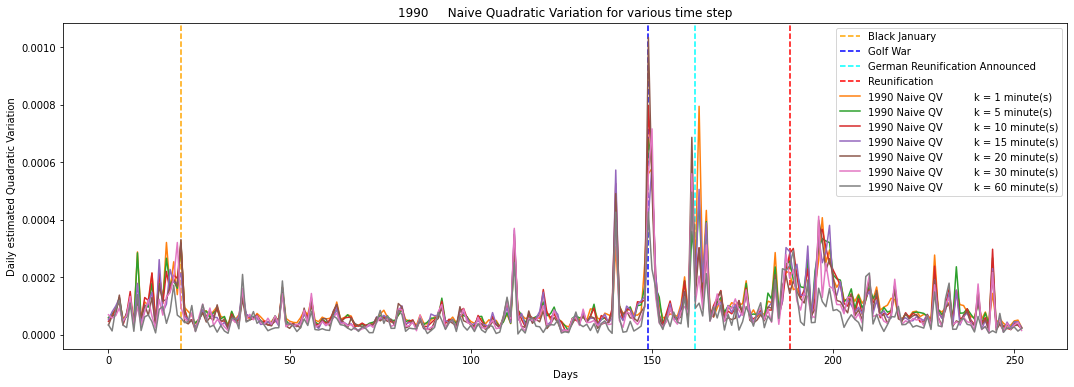

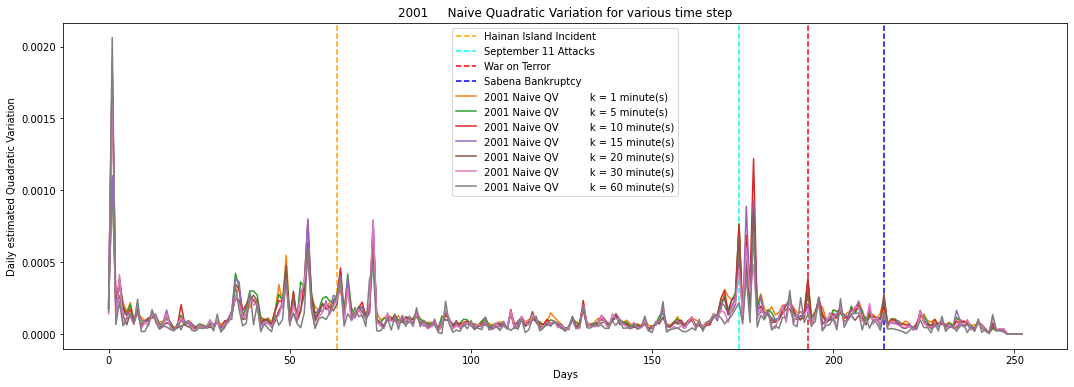

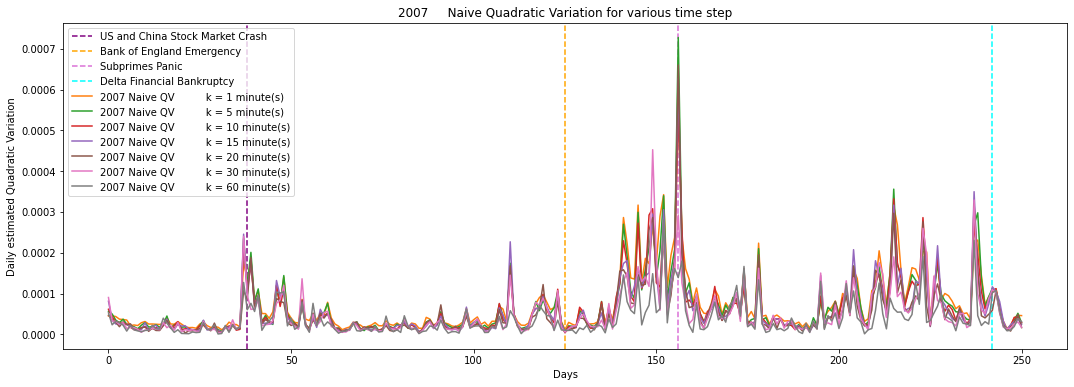

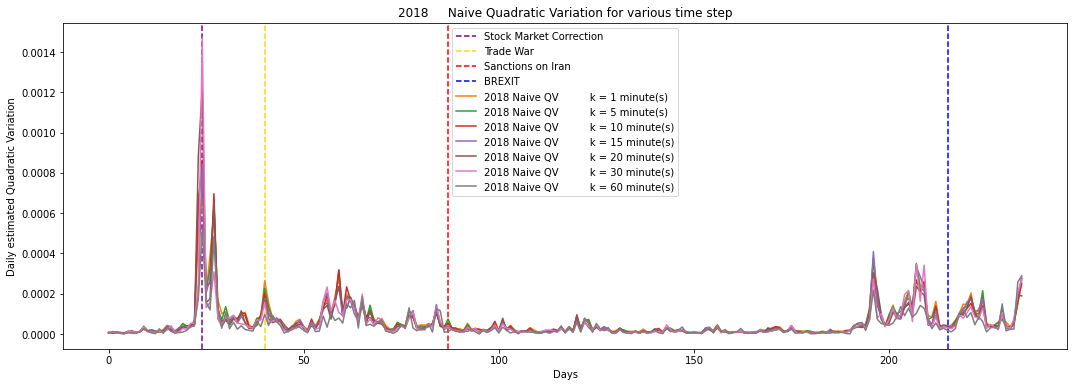

In [31]:

plot_historical_events(df_1990)
plot_naive_qv(df_1990, k_list=k_list)

plot_historical_events(df_2001)
plot_naive_qv(df_2001, k_list=k_list)

plot_historical_events(df_2007)
plot_naive_qv(df_2007, k_list=k_list)

plot_historical_events(df_2018)
plot_naive_qv(df_2018, k_list=k_list)

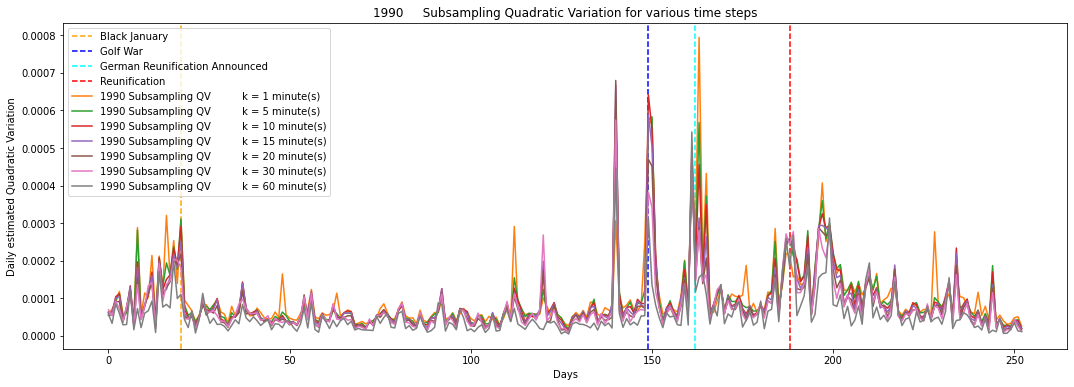

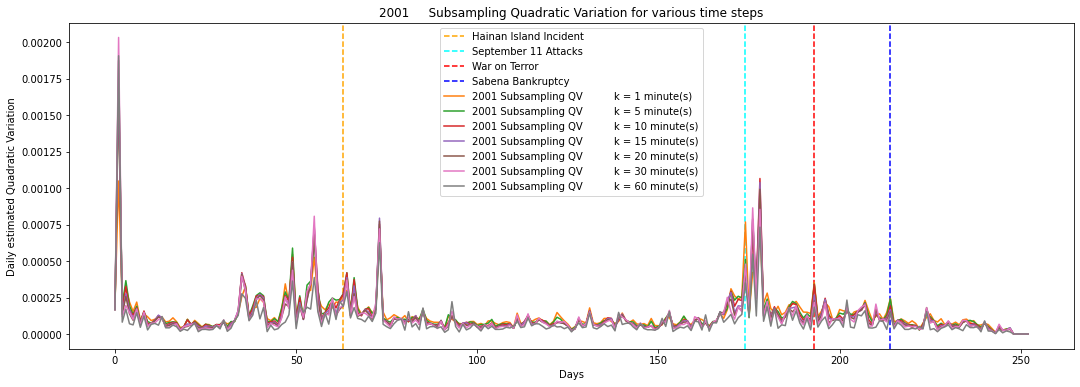

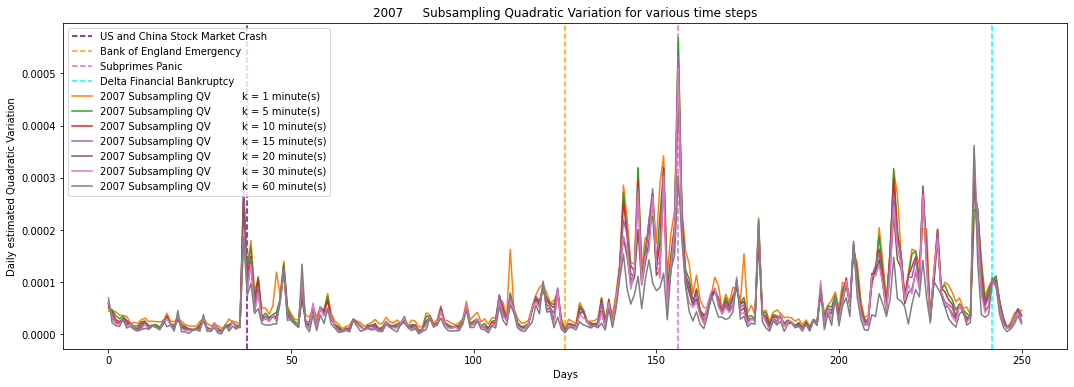

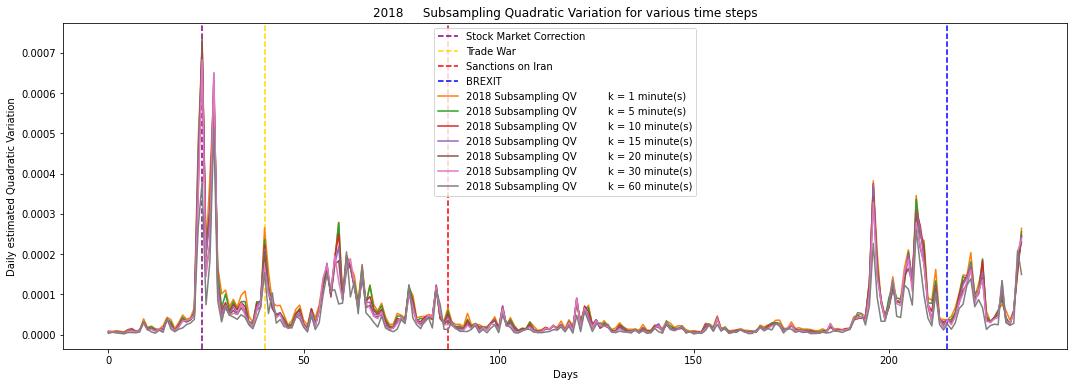

In [32]:
plot_historical_events(df_1990)
plot_subsampling_qv(df_1990, k_list=k_list)

plot_historical_events(df_2001)
plot_subsampling_qv(df_2001, k_list=k_list)

plot_historical_events(df_2007)
plot_subsampling_qv(df_2007, k_list=k_list)

plot_historical_events(df_2018)
plot_subsampling_qv(df_2018, k_list=k_list)

### Question 3

Using the same databases, estimate the integrated variance each day for various time steps.

- Alternatively, estimates the jumps. Are they related to important financial events or it seems that it is only noise?

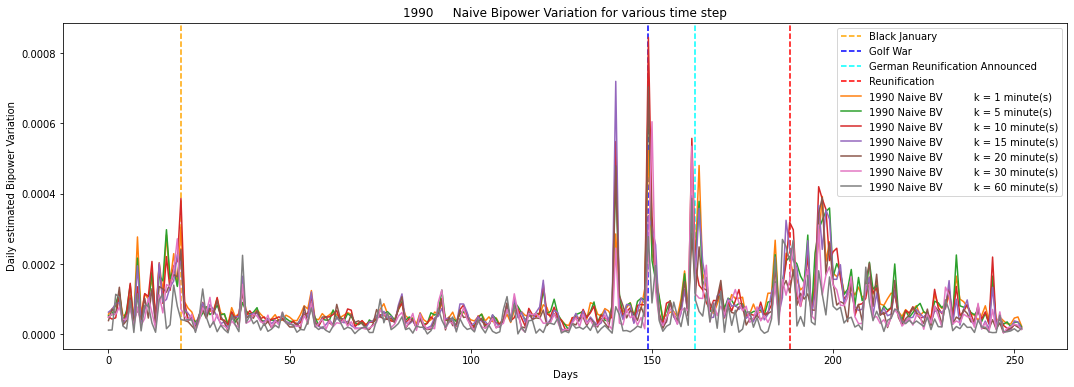

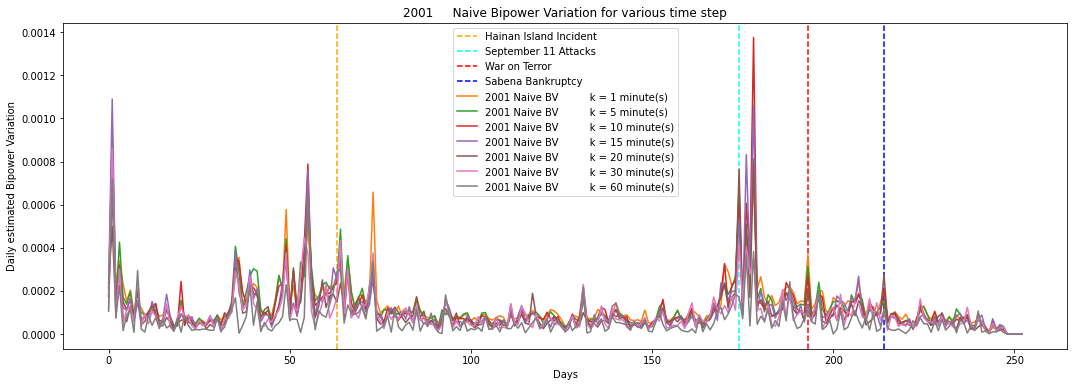

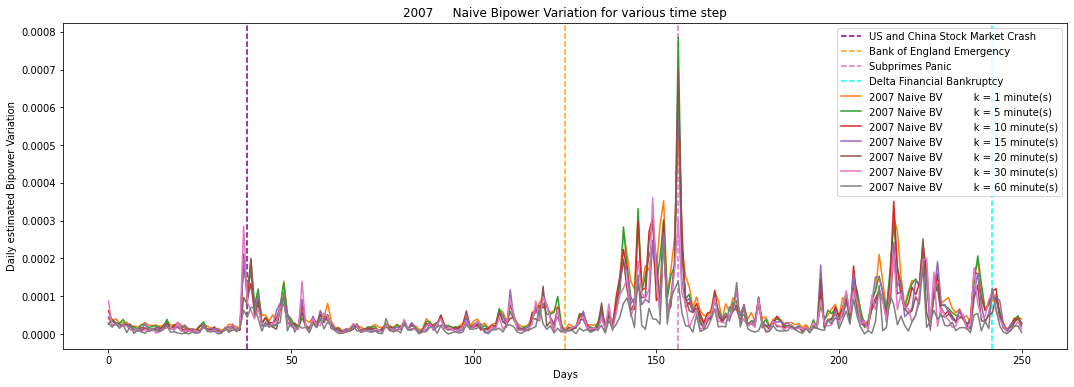

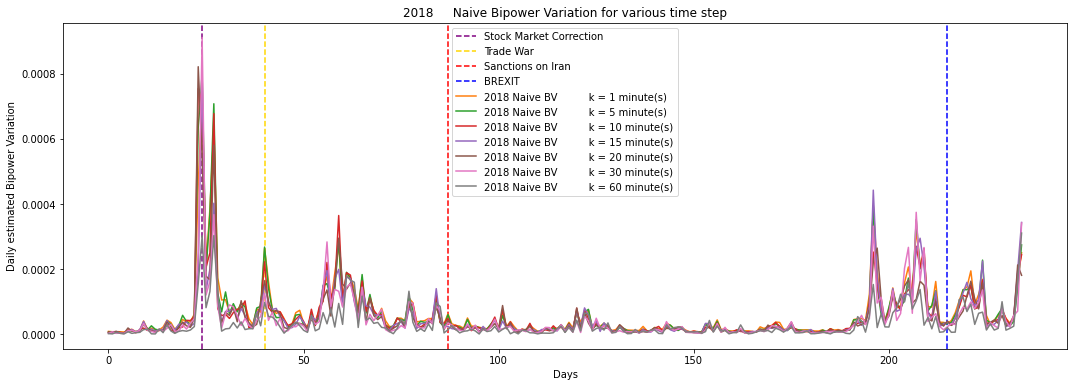

In [33]:
plot_historical_events(df_1990)
plot_naive_bv(df_1990, k_list=k_list)

plot_historical_events(df_2001)
plot_naive_bv(df_2001, k_list=k_list)

plot_historical_events(df_2007)
plot_naive_bv(df_2007, k_list=k_list)

plot_historical_events(df_2018)
plot_naive_bv(df_2018, k_list=k_list)

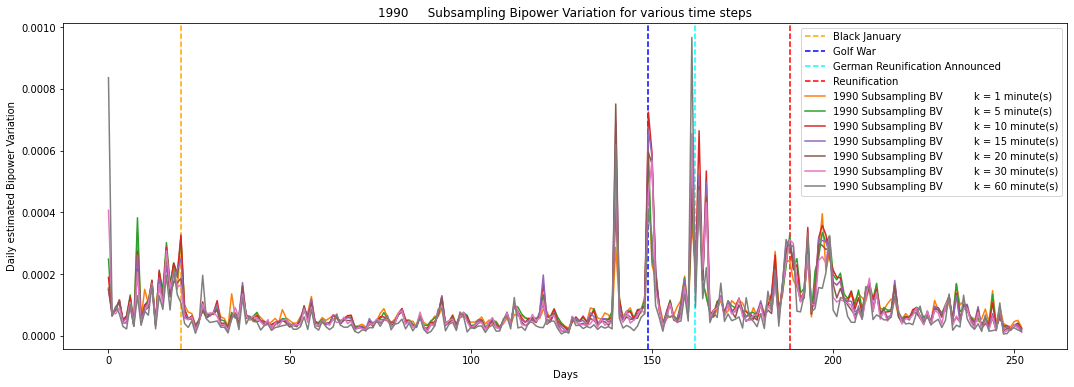

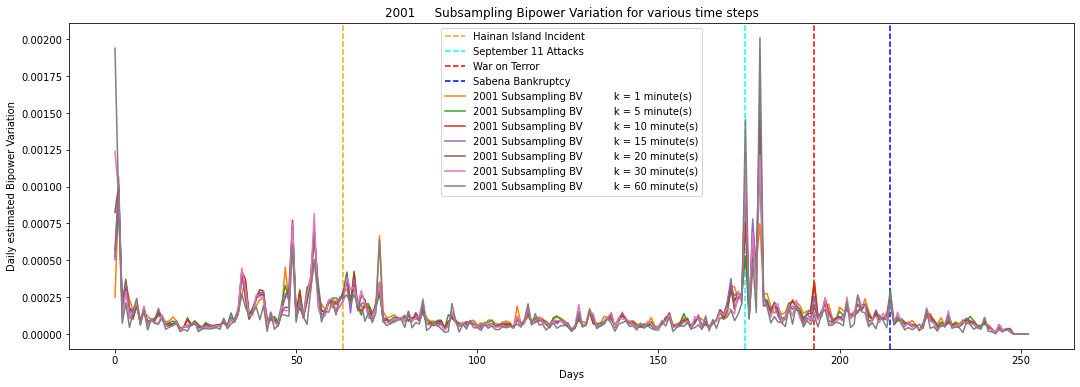

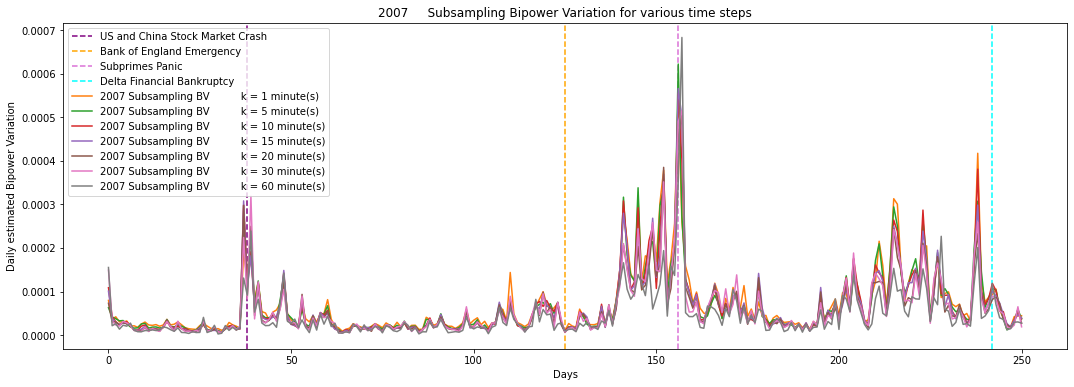

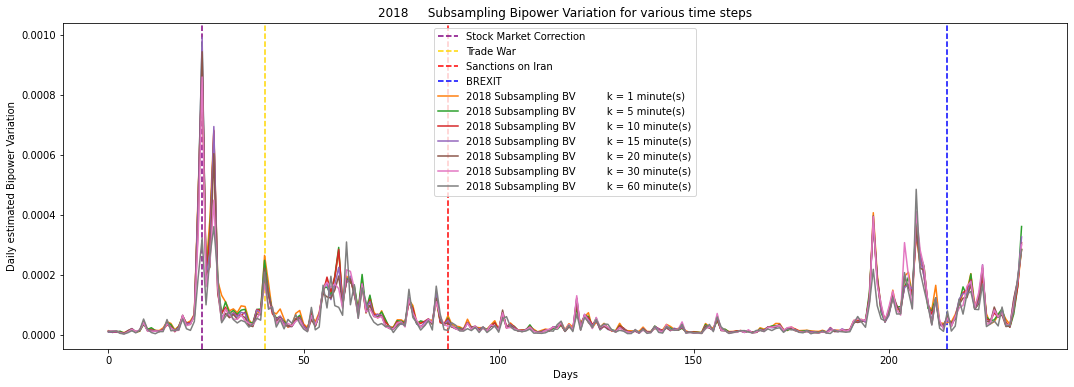

In [34]:
plot_historical_events(df_1990)
plot_subsampling_bv(df_1990, k_list=k_list)

plot_historical_events(df_2001)
plot_subsampling_bv(df_2001, k_list=k_list)

plot_historical_events(df_2007)
plot_subsampling_bv(df_2007, k_list=k_list)

plot_historical_events(df_2018)
plot_subsampling_bv(df_2018, k_list=k_list)

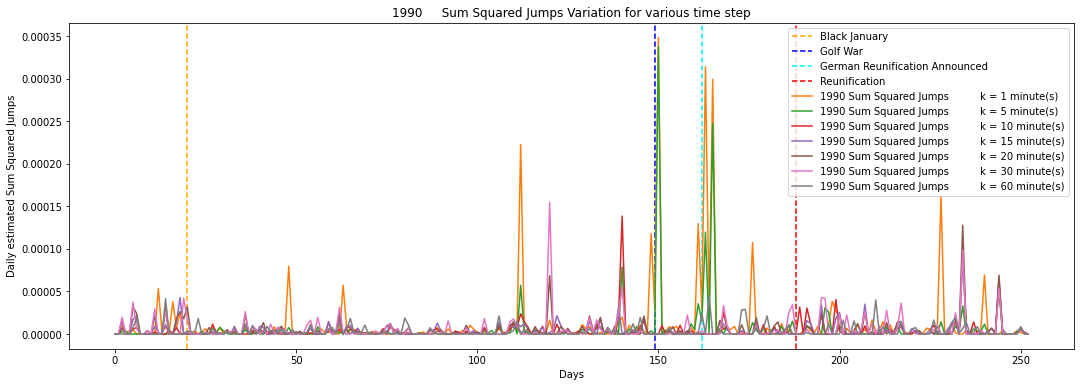

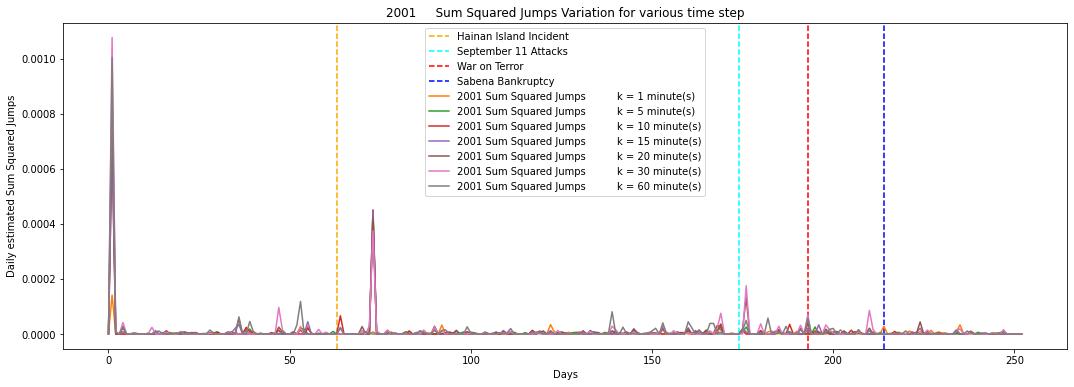

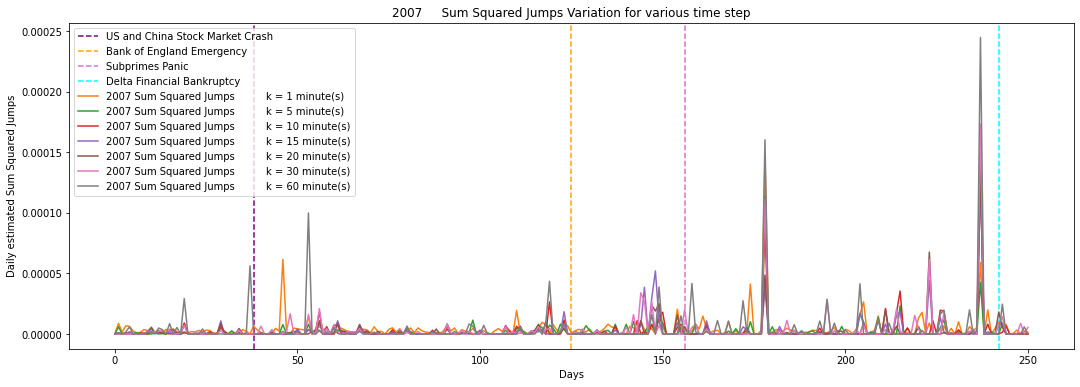

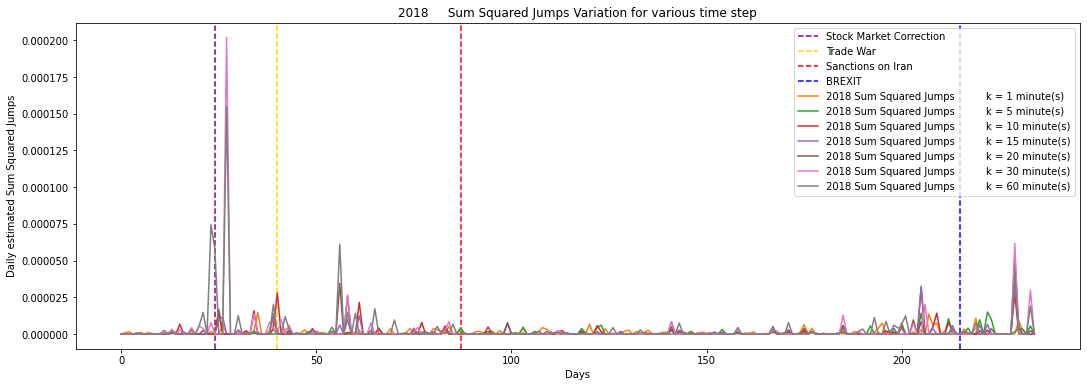

In [35]:
plot_historical_events(df_1990)
plot_ssj(df_1990, k_list=k_list)

plot_historical_events(df_2001)
plot_ssj(df_2001, k_list=k_list)

plot_historical_events(df_2007)
plot_ssj(df_2007, k_list=k_list)

plot_historical_events(df_2018)
plot_ssj(df_2018, k_list=k_list)